# Json To Network

## 01 Data Load

In [1]:
import networkx as nx
import json
import matplotlib.pyplot as plt
# from networkx.algorithms import community
import community # python-louvain
import seaborn as sns
import matplotlib.cm as cm

In [2]:
with open('./Data_20211122.json', 'r', encoding='utf-8') as file:
    data = json.load(file)

In [3]:
data.keys()

dict_keys(['Node_paper', 'Node_text', 'Node_person', 'Node_journal', 'Node_volume', 'Node_book', 'Node_publisher', 'Node_group', 'Node_term', 'Link_person2paper', 'Link_paper2volume', 'Link_paper2book', 'Link_volume2journal', 'Link_group2journal', 'Link_publisher2book', 'Link_text2paper', 'Link_book2text', 'Link_paper2text', 'Link_term2text', 'Link_person2text'])

In [4]:
# Node
data['Node_text']

[{'id': 'T01SP001', 'class_field': 'Text', 'name': '1.서론'},
 {'id': 'T02SP001', 'class_field': 'Text', 'name': "2.문학사의 전회와 '문화론적 연구'"},
 {'id': 'T03SP001', 'class_field': 'Text', 'name': '3.근대 문학주의와 문화적 현실에 대한 성찰'},
 {'id': 'T04SP001',
  'class_field': 'Text',
  'name': "4.문화사로서의 '문화론적 연구'와 문화연구로서의 '문화론적 연구'"},
 {'id': 'T05SP001', 'class_field': 'Text', 'name': '5.결론에 대신하여'}]

In [5]:
# Edge
data['Link_book2text']

[{'sourceid': 'B002',
  'targetid': 'T02SP001',
  'relationEng': 'isCitedIn',
  'relationKor': '인용되다'},
 {'sourceid': 'B003',
  'targetid': 'T01SP001',
  'relationEng': 'isCitedIn',
  'relationKor': '인용되다'},
 {'sourceid': 'B004',
  'targetid': 'T01SP001',
  'relationEng': 'isCitedIn',
  'relationKor': '인용되다'},
 {'sourceid': 'B005',
  'targetid': 'T03SP001',
  'relationEng': 'isCitedIn',
  'relationKor': '인용되다'},
 {'sourceid': 'B006',
  'targetid': 'T01SP001',
  'relationEng': 'isCitedIn',
  'relationKor': '인용되다'},
 {'sourceid': 'B007',
  'targetid': 'T03SP001',
  'relationEng': 'isCitedIn',
  'relationKor': '인용되다'},
 {'sourceid': 'B008',
  'targetid': 'T02SP001',
  'relationEng': 'isCitedIn',
  'relationKor': '인용되다'}]

## 02 Network

In [6]:
# 네트워크 초기화
# G = nx.MultiGraph()
G = nx.Graph()

#### Node 추가

In [7]:
# Json에서 Node만 가져오기
Nodes = {k:v for k, v in data.items() if k.startswith('Node')}

In [8]:
Nodes.keys()

dict_keys(['Node_paper', 'Node_text', 'Node_person', 'Node_journal', 'Node_volume', 'Node_book', 'Node_publisher', 'Node_group', 'Node_term'])

In [9]:
# id(node 고유이름)
Nodes['Node_paper'][0]['id']

'SP001'

In [10]:
# attribute(id 제외한 속성)
{k:v for k,v in Nodes['Node_paper'][0].items() if k!='id'}

{'class_field': 'Paper',
 'name': "'문화론적 연구'의 현실 인식과 전망",
 'url': 'http://www.klbksk.com/wiki/index.php/HDAA0001'}

In [11]:
# add_nodes_from 함수에 node와 attribute 투입
for node_key in Nodes:
    print(node_key)
    G.add_nodes_from([(N['id'],{k:v for k,v in N.items() if k!='id'}) for N in Nodes[node_key]])

Node_paper
Node_text
Node_person
Node_journal
Node_volume
Node_book
Node_publisher
Node_group
Node_term


In [12]:
# 추가된 node 확인
G.nodes

NodeView(('SP001', 'SP002', 'SP003', 'SP004', 'SP005', 'SP006', 'SP007', 'SP008', 'SP009', 'SP010', 'SP011', 'SP012', 'T01SP001', 'T02SP001', 'T03SP001', 'T04SP001', 'T05SP001', 'P001', 'P002', 'P003', 'P004', 'P005', 'P006', 'P007', 'P008', 'P009', 'P010', 'P011', 'P012', 'P013', 'P014', 'P015', 'P016', 'P017', 'P018', 'P019', 'J001', 'J002', 'J003', 'J004', 'J005', 'J006', 'J007', 'J008', 'J009', 'V001', 'V002', 'V003', 'V004', 'V005', 'V006', 'V007', 'V008', 'V009', 'V010', 'B001', 'B002', 'B003', 'B004', 'B005', 'B006', 'B007', 'B008', 'PB001', 'PB002', 'PB003', 'PB004', 'PB005', 'PB006', 'PB007', 'G001', 'G002', 'G003', 'G004', 'G005', 'G006', 'TM001', 'TM002', 'TM003'))

#### Edge 추가

In [13]:
# Json에서 Edge만 가져오기
Edges = {k:v for k, v in data.items() if k.startswith('Link')}
Edges

{'Link_person2paper': [{'sourceid': 'P001',
   'targetid': 'SP001',
   'relationEng': 'writes',
   'relationKor': '저술하다'},
  {'sourceid': 'P002',
   'targetid': 'SP002',
   'relationEng': 'writes',
   'relationKor': '저술하다'},
  {'sourceid': 'P003',
   'targetid': 'SP003',
   'relationEng': 'writes',
   'relationKor': '저술하다'},
  {'sourceid': 'P004',
   'targetid': 'SP004',
   'relationEng': 'writes',
   'relationKor': '저술하다'},
  {'sourceid': 'P005',
   'targetid': 'SP005',
   'relationEng': 'writes',
   'relationKor': '저술하다'},
  {'sourceid': 'P006',
   'targetid': 'SP006',
   'relationEng': 'writes',
   'relationKor': '저술하다'},
  {'sourceid': 'P007',
   'targetid': 'SP007',
   'relationEng': 'writes',
   'relationKor': '저술하다'},
  {'sourceid': 'P008',
   'targetid': 'SP008',
   'relationEng': 'writes',
   'relationKor': '저술하다'},
  {'sourceid': 'P001',
   'targetid': 'SP009',
   'relationEng': 'writes',
   'relationKor': '저술하다'},
  {'sourceid': 'P009',
   'targetid': 'SP010',
   'relationEn

In [14]:
Edges.keys()

dict_keys(['Link_person2paper', 'Link_paper2volume', 'Link_paper2book', 'Link_volume2journal', 'Link_group2journal', 'Link_publisher2book', 'Link_text2paper', 'Link_book2text', 'Link_paper2text', 'Link_term2text', 'Link_person2text'])

In [15]:
# add_edges_from 함수에 source, target과 attribute 투입
for edge_key in Edges:
    print(edge_key)
    G.add_edges_from([(E['sourceid'],E['targetid'],{k:v for k,v in E.items() if 'id' not in k}) for E in Edges[edge_key]])

Link_person2paper
Link_paper2volume
Link_paper2book
Link_volume2journal
Link_group2journal
Link_publisher2book
Link_text2paper
Link_book2text
Link_paper2text
Link_term2text
Link_person2text


In [16]:
# 추가된 edge 확인
G.edges

EdgeView([('SP001', 'P001'), ('SP001', 'V001'), ('SP001', 'T01SP001'), ('SP001', 'T02SP001'), ('SP001', 'T03SP001'), ('SP001', 'T04SP001'), ('SP001', 'T05SP001'), ('SP002', 'P002'), ('SP002', 'V002'), ('SP002', 'T02SP001'), ('SP003', 'P003'), ('SP003', 'V003'), ('SP003', 'T01SP001'), ('SP004', 'P004'), ('SP004', 'V004'), ('SP004', 'T02SP001'), ('SP005', 'P005'), ('SP005', 'B001'), ('SP005', 'T01SP001'), ('SP006', 'P006'), ('SP006', 'V005'), ('SP006', 'T02SP001'), ('SP007', 'P007'), ('SP007', 'V006'), ('SP007', 'T03SP001'), ('SP008', 'P008'), ('SP008', 'V003'), ('SP008', 'T01SP001'), ('SP009', 'P001'), ('SP009', 'V007'), ('SP009', 'T02SP001'), ('SP010', 'P009'), ('SP010', 'V008'), ('SP010', 'T03SP001'), ('SP011', 'P010'), ('SP011', 'V009'), ('SP011', 'T03SP001'), ('SP012', 'P010'), ('SP012', 'V010'), ('SP012', 'T02SP001'), ('T01SP001', 'B003'), ('T01SP001', 'B004'), ('T01SP001', 'B006'), ('T01SP001', 'P012'), ('T02SP001', 'B002'), ('T02SP001', 'B008'), ('T02SP001', 'TM002'), ('T02SP001'

## 03 Community Detection
Louvain Community Detection : https://github.com/taynaud/python-louvain  
https://github.com/timsainb/graph_research_notes/blob/master/notebooks/1.0-make-networkx-graph.ipynb

In [17]:
# compute the best partition
partition = community.best_partition(G)
set(partition.values())

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16}

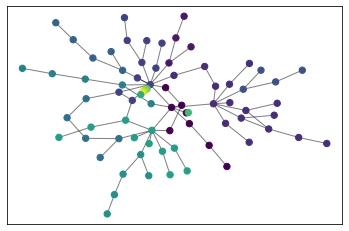

In [18]:
# draw the graph
# pos = nx.spring_layout(G)
pos = nx.drawing.layout.kamada_kawai_layout(G)
# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=40,
                       cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

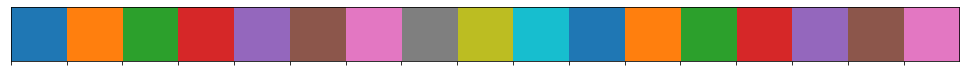

In [19]:
# 커뮤니티
pal = sns.color_palette("tab10", n_colors=len(set(partition.values())))
sns.palplot(pal)

In [20]:
# spring_pos = nx.spring_layout(G, k=1/len(G.nodes())**.25)
kamada_kawai_pos = nx.drawing.layout.kamada_kawai_layout(G)

## 04 Export graph file

In [21]:
G_Json = nx.json_graph.node_link_data(G)
G_Json

{'directed': False,
 'multigraph': False,
 'graph': {},
 'nodes': [{'class_field': 'Paper',
   'name': "'문화론적 연구'의 현실 인식과 전망",
   'url': 'http://www.klbksk.com/wiki/index.php/HDAA0001',
   'id': 'SP001'},
  {'class_field': 'Paper',
   'name': "'근대문학의 종언, 그리고 '소설'이라고 불리는 대략난감한 글쓰기들",
   'url': '',
   'id': 'SP002'},
  {'class_field': 'Paper', 'name': "'풍속사'와 문학의 질서", 'url': '', 'id': 'SP003'},
  {'class_field': 'Paper', 'name': '문학을 넘어서는 문학의 길', 'url': '', 'id': 'SP004'},
  {'class_field': 'Paper', 'name': '풍속·문화·문학사', 'url': '', 'id': 'SP005'},
  {'class_field': 'Paper',
   'name': "'문학' '史' 없는 시대의 문학연구",
   'url': '',
   'id': 'SP006'},
  {'class_field': 'Paper',
   'name': '문학의 전락―무라카미[村上] 현상을 놓고',
   'url': '',
   'id': 'SP007'},
  {'class_field': 'Paper', 'name': '오딧세우스의 변명', 'url': '', 'id': 'SP008'},
  {'class_field': 'Paper',
   'name': '새로운 글쓰기와 문학연구에 대한 시론',
   'url': '',
   'id': 'SP009'},
  {'class_field': 'Paper', 'name': '개인의 이데올로기를 넘어서', 'url': '', 'id': 'SP010'},
  {'cla

In [22]:
# node에 community(group), x,y, color 추가
# kamada_kawai_layout 활용
for node in G_Json['nodes']:
    node['key'] = node.pop('id')
    node['label'] = node.pop('name')
    node['attributes'] = {}
    node['attributes']['group'] = partition[node['key']]
    node['attributes']['x'] = int(kamada_kawai_pos[node['key']][0] * 256)
    node['attributes']['y'] = int(kamada_kawai_pos[node['key']][1] * 256)
    node['attributes']['color'] = "rgba("+ ",".join([str(int(i * 255)) for i in pal[partition[node['key']]]])+ ")"

In [23]:
for i in range(len(G_Json['links'])):
    G_Json['links'][i]['id']=i
    G_Json['links'][i]['label'] = G_Json['links'][i]['relationKor']

In [24]:
G_Json

{'directed': False,
 'multigraph': False,
 'graph': {},
 'nodes': [{'class_field': 'Paper',
   'url': 'http://www.klbksk.com/wiki/index.php/HDAA0001',
   'key': 'SP001',
   'label': "'문화론적 연구'의 현실 인식과 전망",
   'attributes': {'group': 0, 'x': 9, 'y': -11, 'color': 'rgba(31,119,180)'}},
  {'class_field': 'Paper',
   'url': '',
   'key': 'SP002',
   'label': "'근대문학의 종언, 그리고 '소설'이라고 불리는 대략난감한 글쓰기들",
   'attributes': {'group': 1, 'x': 5, 'y': 91, 'color': 'rgba(255,127,14)'}},
  {'class_field': 'Paper',
   'url': '',
   'key': 'SP003',
   'label': "'풍속사'와 문학의 질서",
   'attributes': {'group': 2, 'x': 127, 'y': -18, 'color': 'rgba(44,160,44)'}},
  {'class_field': 'Paper',
   'url': '',
   'key': 'SP004',
   'label': '문학을 넘어서는 문학의 길',
   'attributes': {'group': 3, 'x': -37, 'y': 92, 'color': 'rgba(214,39,40)'}},
  {'class_field': 'Paper',
   'url': '',
   'key': 'SP005',
   'label': '풍속·문화·문학사',
   'attributes': {'group': 4,
    'x': 123,
    'y': 30,
    'color': 'rgba(148,103,189)'}},
  {'clas

In [25]:
# json 파일로 네트워크 저장
# json.dump(G_Json,open('graph_data.json','w'))
with open('graph_data.json', 'w') as f:
    json.dump(G_Json,
              f, indent=4)